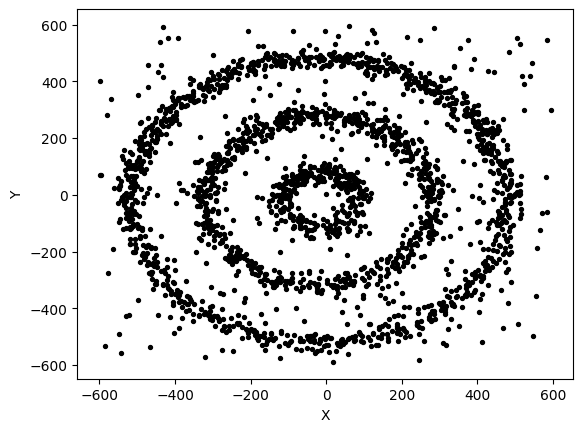

In [2]:
import matplotlib.pyplot as plt
import numpy as np
X = np.loadtxt("dataset2.csv", delimiter=",")
plt.scatter(X[:,0],X[:,1],color='k',s=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We can find the elbow points by finding the inflection points on the curve(Points where the rate of change of slope =0).

In our situation we can find points where the rate of change of slope goes from negative to positive


In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
def eps_range(X,k):
  nbrs=NearestNeighbors(n_neighbors=k).fit(X)
  d,i=nbrs.kneighbors(X)
  kd=d[:,k-1]
  sorted_d=np.sort(kd)
  x=[]
  y=[]
  for i in range(0,len(sorted_d)):
    if i%1==0:
      x.append(i)
      y.append(sorted_d[i])
  x=np.array(x)
  y=np.array(y)
  dy=np.gradient(y,x)
  d2y=np.gradient(dy,x)
  inf_coord=np.where(np.diff(np.sign(d2y))>0)[0]+1
  y=y[inf_coord]
  epsilon_range=[]
  for k in y:
    if int(k) not in epsilon_range:
      epsilon_range.append(int(k))
  print(epsilon_range)

eps_range(np.loadtxt("dataset2.csv", delimiter=","),2)


FileNotFoundError: ignored

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt("dataset2.csv", delimiter=",")
nbrs = NearestNeighbors(n_neighbors=2,algorithm='auto').fit(X)
d,i=nbrs.kneighbors(X)
kd=d[:,1]
sorted_d=np.sort(kd)
plt.plot(sorted_d)  
plt.xlabel('Index')
plt.ylabel('K-Distance')
plt.show()

In [2]:
def dbscan(X,e,num):
  points=[]
  d=np.linalg.norm(X[:,np.newaxis] - X,axis=2)
  labels=np.full(X.shape[0],-1)
  for i in range(X.shape[0]):
      if np.sum(d[i]<=e)>=num:
          points.append(i)
  c=0
  for i in points:
      if labels[i]==-1:
          n=[i]
          c+=1
          labels[i]=c
          while n:
              neighbor=n.pop(0)
              neighbor_indices=np.where(d[neighbor]<=e)[0]
              if len(neighbor_indices)>=num:
                  for idx in neighbor_indices:
                      if labels[idx]==-1:
                          n.append(idx)
                          labels[idx]=c
              else:
                  for idx in neighbor_indices:
                      if labels[idx]==-1:
                          labels[idx]=c
  return labels

In [3]:
def partb(X,no,erange):
  for e in erange:
    r=dbscan(X,e,no)
    clusters=np.unique(r)
    c=plt.cm.Spectral(np.linspace(0,1,len(clusters)))
    for i,cluster in enumerate(clusters):
      if cluster==-1:
        color='k'
      else:
        color=c[i]
      plt.scatter(X[r==cluster,0],X[r==cluster,1],c=color,s=5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'DBSCAN Clustering for Epsilon = {e}')
    print('No of clusters :',len(set(r))-(1 if -1 in r else 0))
    plt.show()

<ipython-input-5-1117850c9f07>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[r==cluster,0],X[r==cluster,1],c=color,s=5)


No of clusters : 98


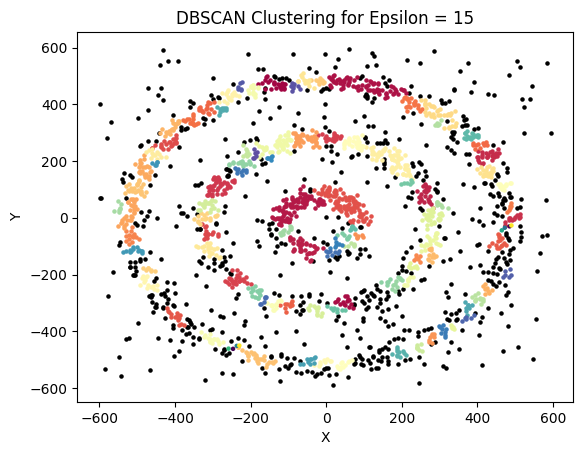

No of clusters : 82


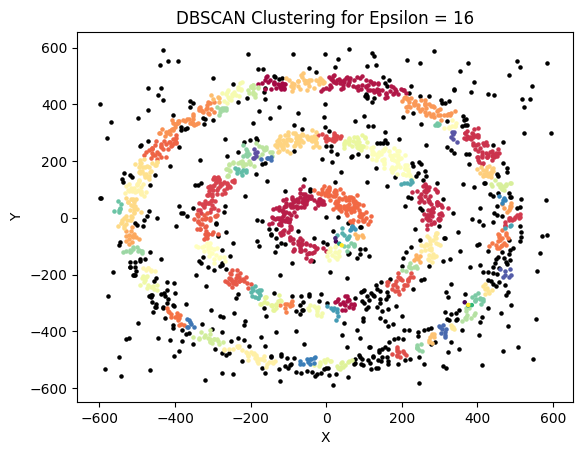

No of clusters : 69


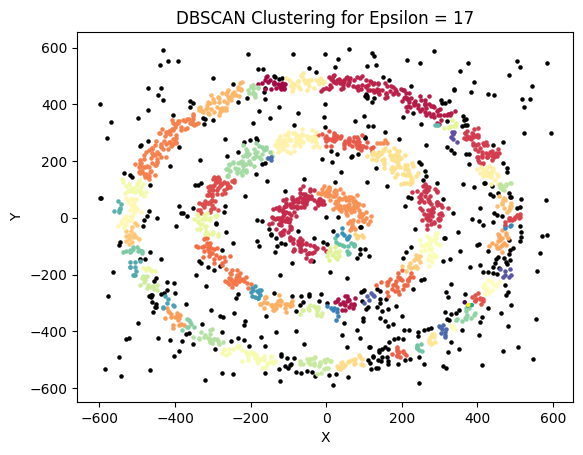

No of clusters : 48


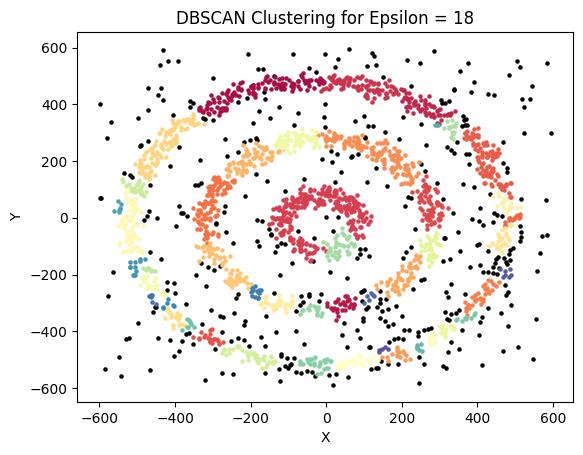

No of clusters : 38


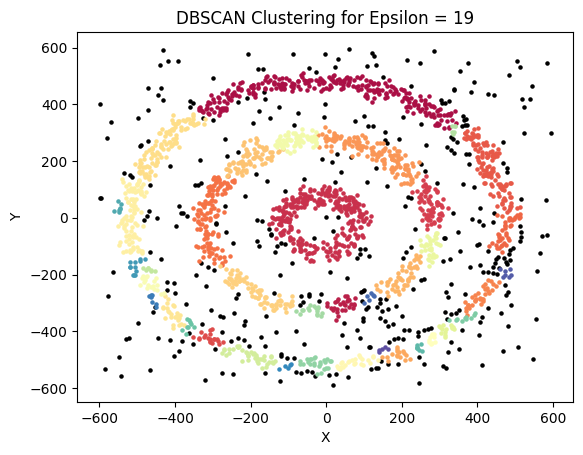

No of clusters : 26


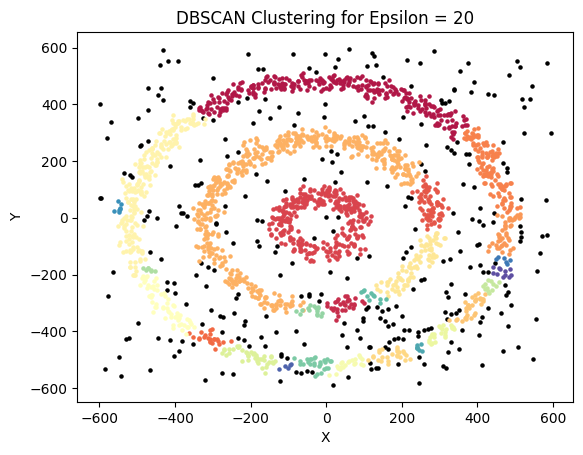

No of clusters : 21


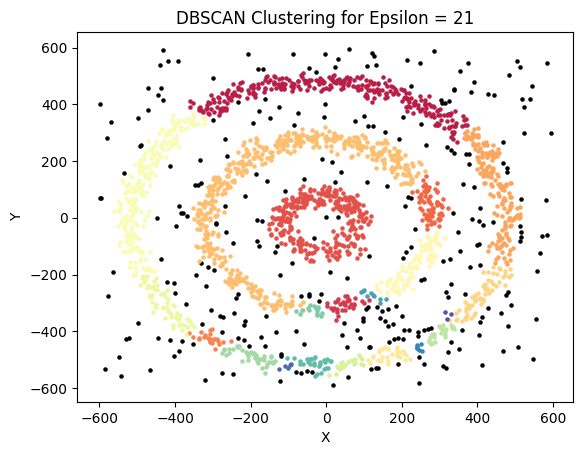

No of clusters : 13


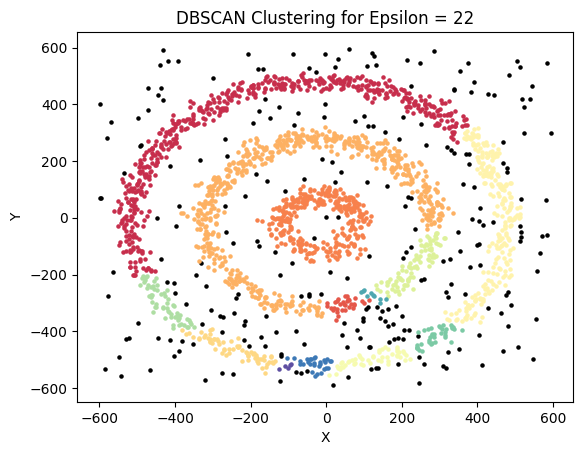

No of clusters : 6


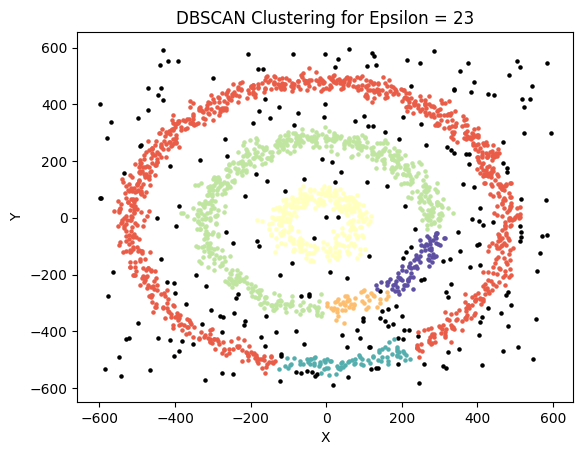

No of clusters : 4


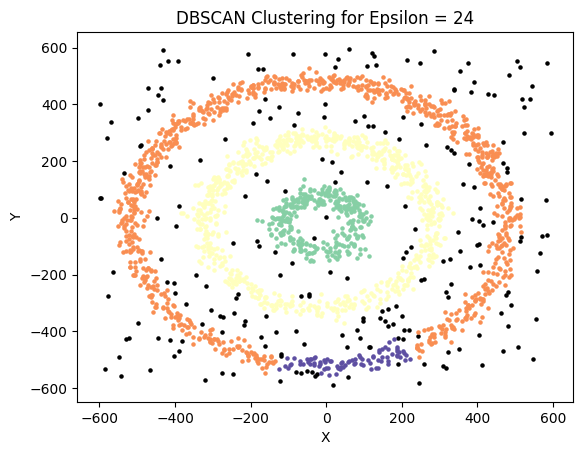

No of clusters : 4


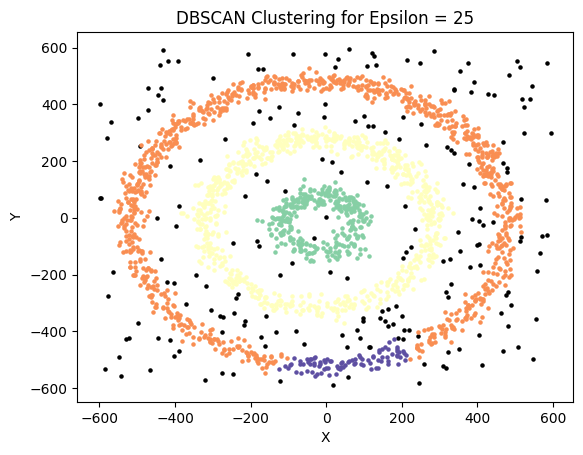

No of clusters : 4


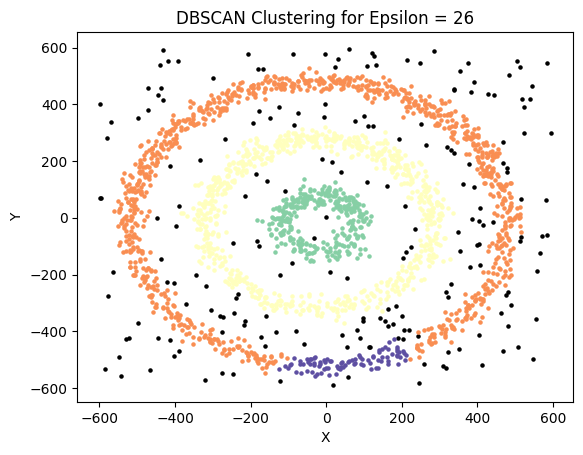

No of clusters : 4


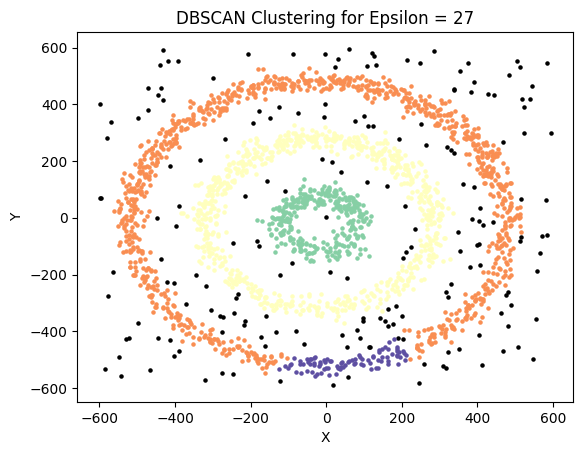

No of clusters : 3


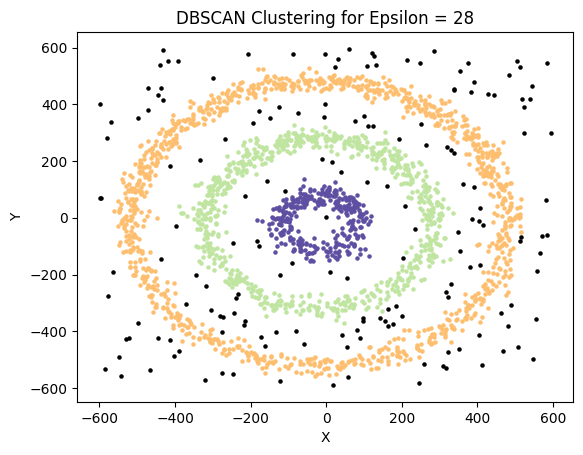

No of clusters : 3


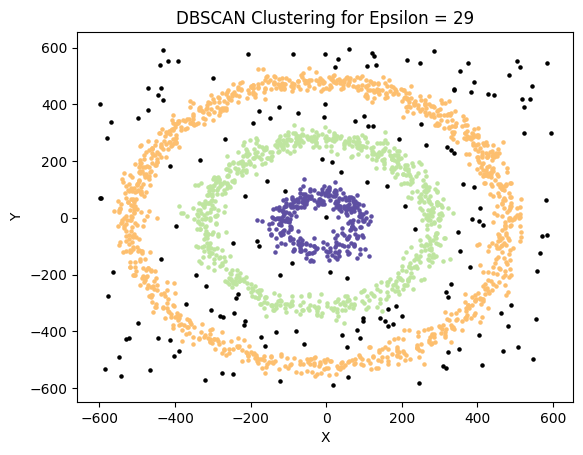

No of clusters : 3


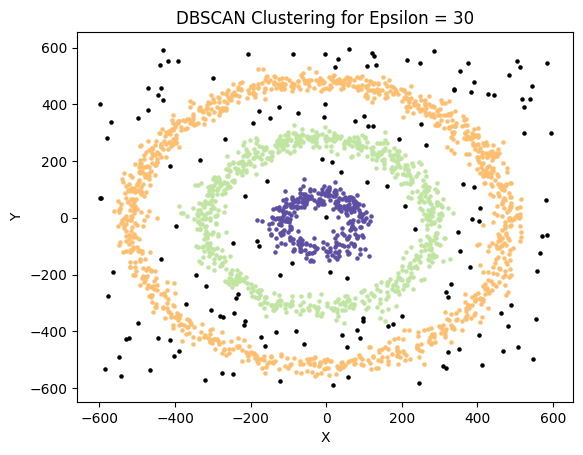

No of clusters : 3


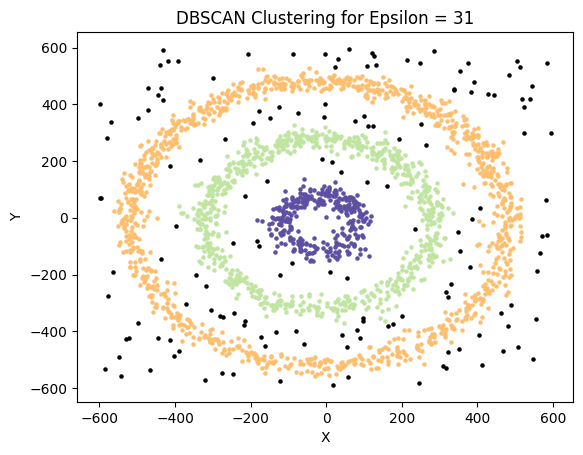

No of clusters : 3


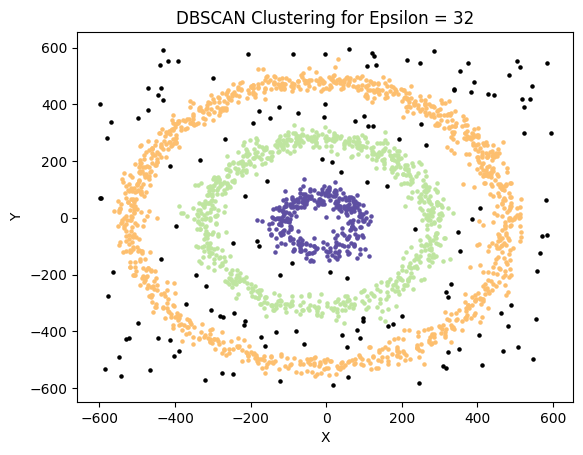

No of clusters : 3


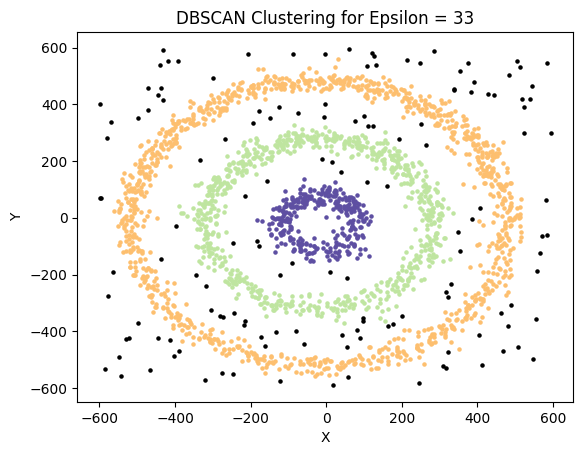

No of clusters : 3


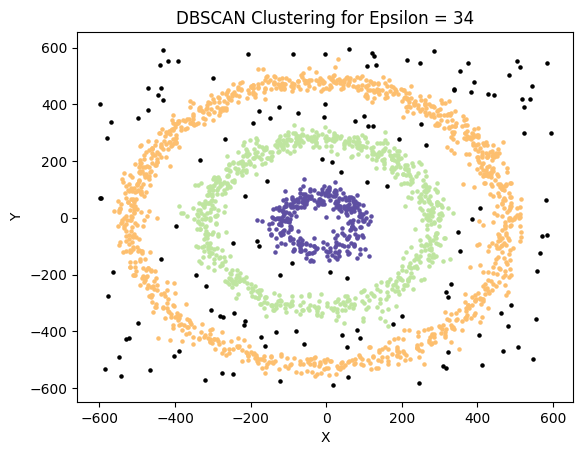

No of clusters : 3


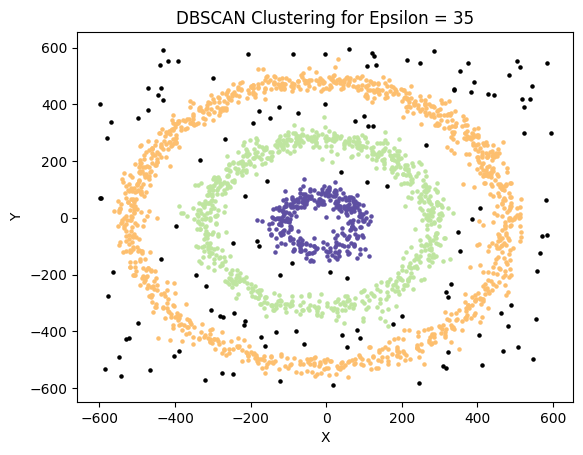

No of clusters : 3


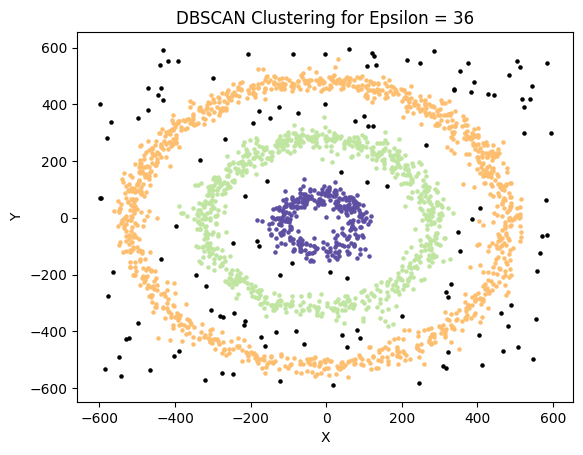

No of clusters : 2


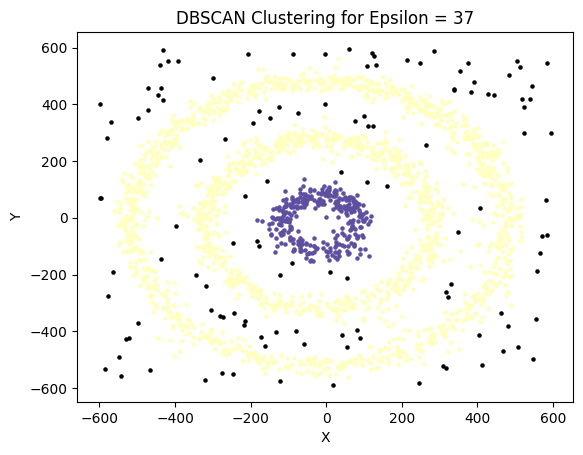

No of clusters : 2


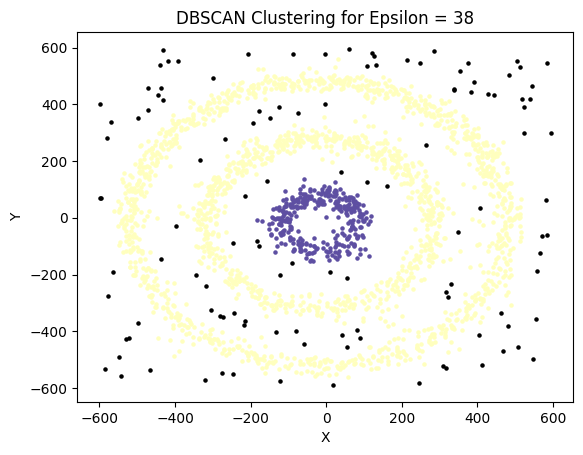

No of clusters : 2


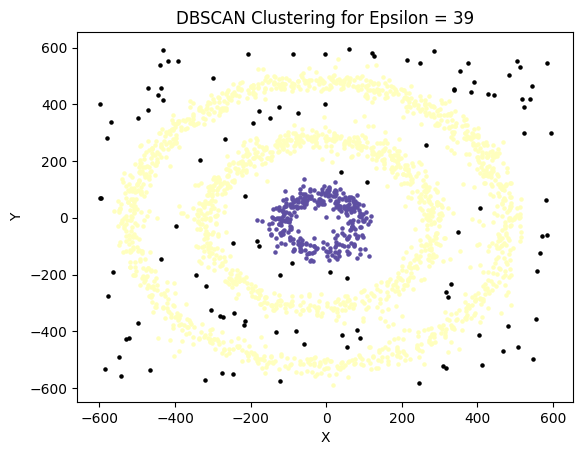

No of clusters : 2


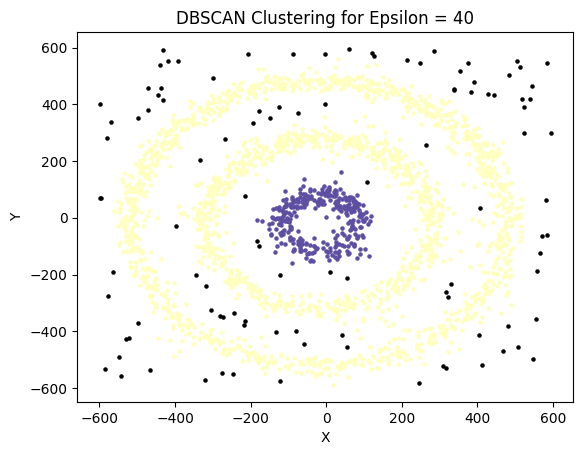

In [ ]:
X = np.loadtxt("dataset2.csv", delimiter=",")
erange=[]
for i in range(15,41):
  erange.append(i)
partb(X,5,erange)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


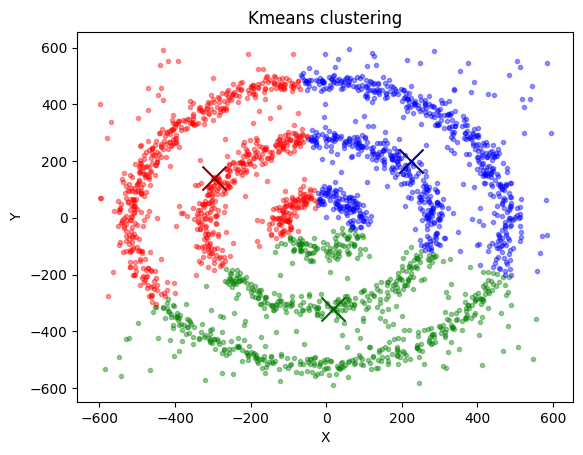

In [16]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
X=np.loadtxt("dataset2.csv",delimiter=",")
model=KMeans(n_clusters=3)
model.fit(X)
l=model.labels_
centroids=model.cluster_centers_
colors=['r','b','g']
for i in range(len(X)):
    plt.scatter(X[i,0],X[i,1],color=colors[l[i]],alpha=0.4,s=9)
i=0
colors=['darkred','darkblue','darkgreen']
for c in centroids:
  plt.scatter(c[0],c[1],marker='x',color=colors[i],s=300)
  i+=1
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kmeans clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


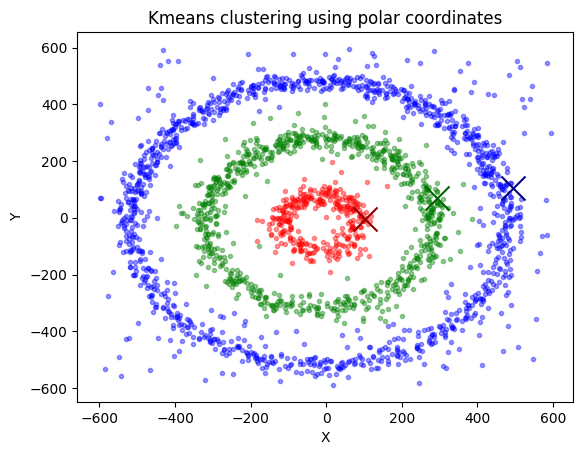

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
X=np.loadtxt("dataset2.csv", delimiter=",")
r=np.sqrt(X[:,0]*X[:,0] + X[:,1]*X[:,1])
theta=np.arctan2(X[:, 1], X[:, 0])
X_polar=np.column_stack((r, theta))
# Perform clustering using KMeans
model=KMeans(n_clusters=3)
#instead of xcoord and ycoord it is now r and theta
model.fit(X_polar)
l=model.labels_
centroids=model.cluster_centers_
# Plot the results
colors=['r','b','g']
for i in range(len(X)):
    plt.scatter(X[i,0],X[i,1],color=colors[l[i]],alpha=0.4,s=9)
i = 0
colors=['darkred','darkblue','darkgreen']
for c in centroids:
    x=c[0] * np.cos(c[1])
    y=c[0] * np.sin(c[1])
    plt.scatter(x,y,marker='x',color=colors[i],s=300)
    i+=1
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kmeans clustering using polar coordinates')
plt.show()


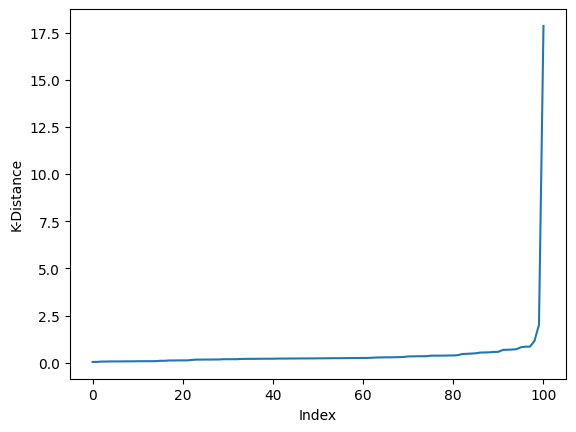

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt("dataset3.csv", delimiter=",")
nbrs=NearestNeighbors(n_neighbors=2,algorithm='auto').fit(X)
d,i=nbrs.kneighbors(X)
kd=d[:,1]
sorted_d=np.sort(kd)
plt.plot(sorted_d)
plt.xlabel('Index')
plt.ylabel('K-Distance')
plt.show()

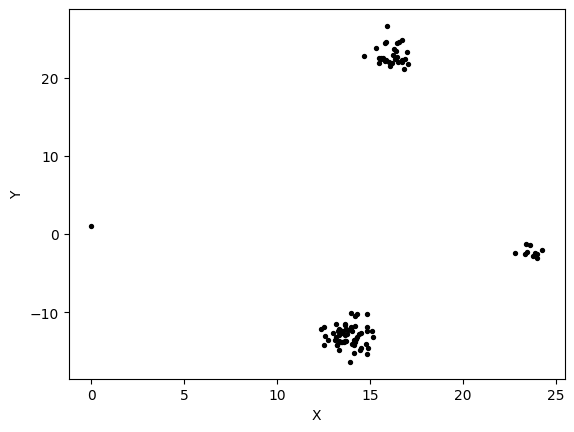

No of clusters : 0


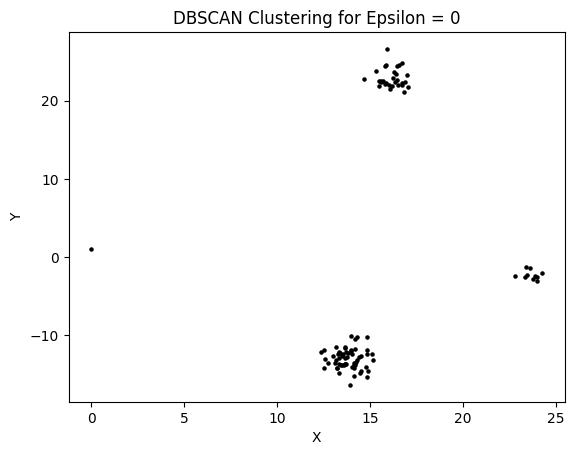

No of clusters : 2


<ipython-input-5-1117850c9f07>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[r==cluster,0],X[r==cluster,1],c=color,s=5)


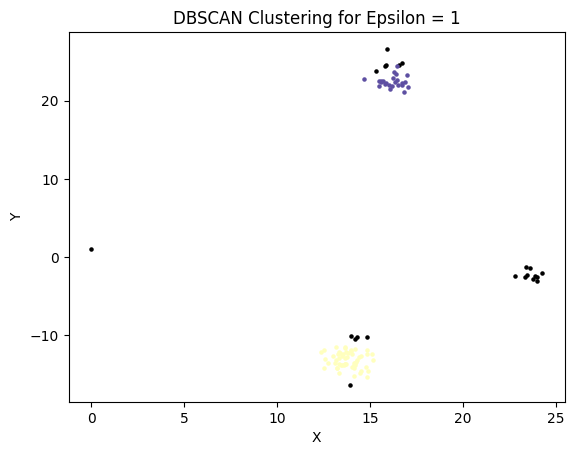

No of clusters : 2


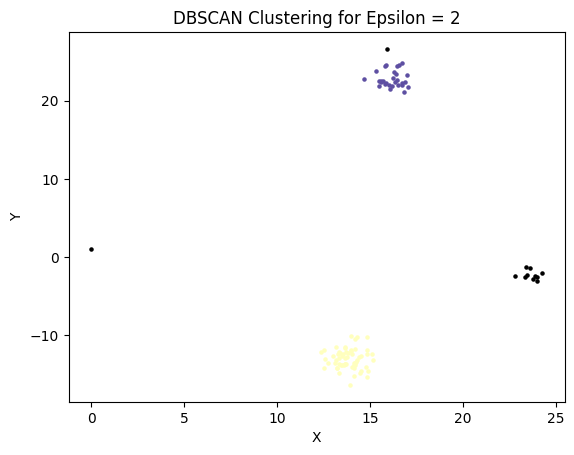

No of clusters : 2


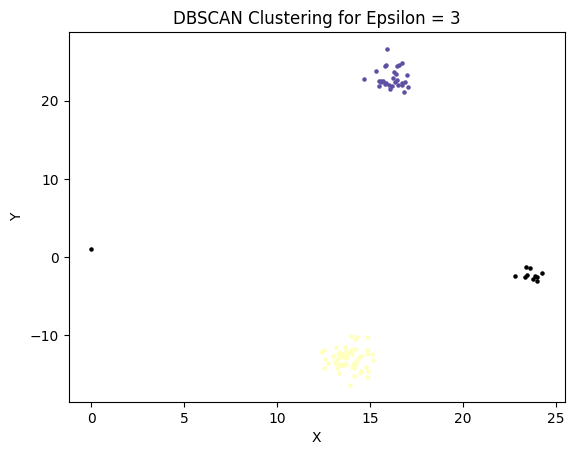

No of clusters : 2


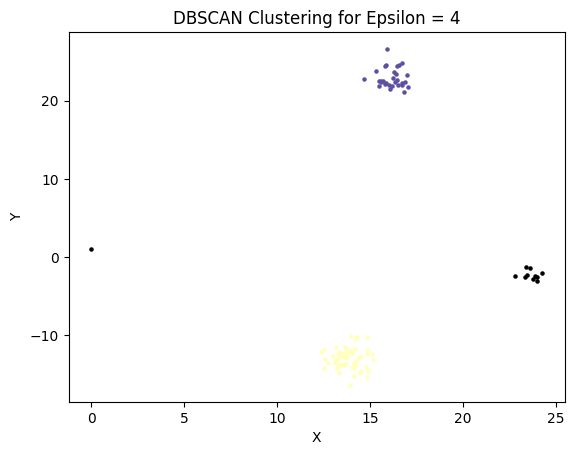

No of clusters : 2


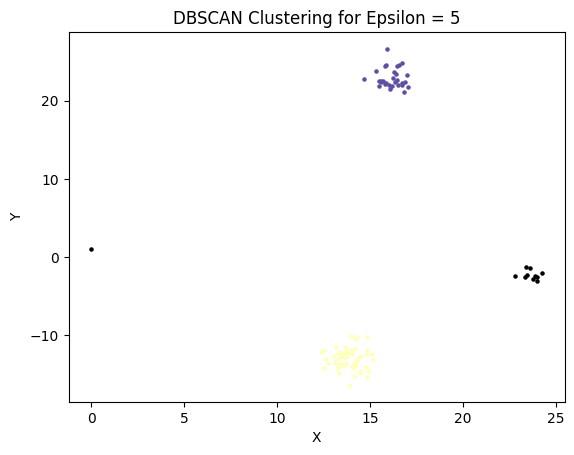

In [6]:
import matplotlib.pyplot as plt
X=np.loadtxt("dataset3.csv",delimiter=",")
plt.scatter(X[:,0],X[:,1],color='k',s=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
X=np.loadtxt("dataset3.csv",delimiter=",")
erange=[]
for i in range(0,6):
  erange.append(i)
partb(X,15,erange)

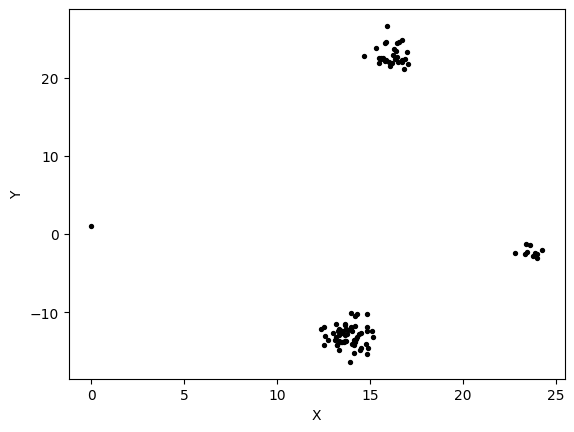

No of clusters : 0


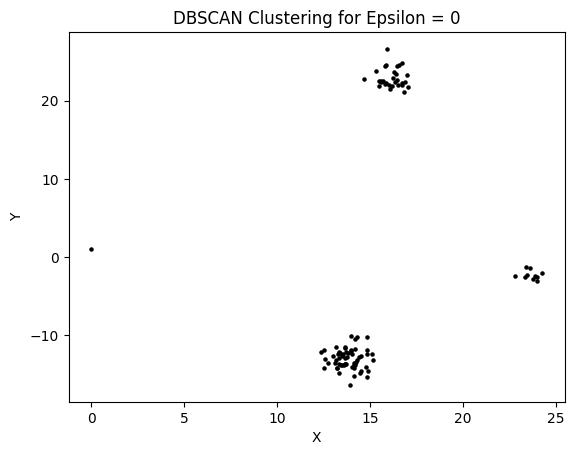

<ipython-input-3-1117850c9f07>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[r==cluster,0],X[r==cluster,1],c=color,s=5)


No of clusters : 2


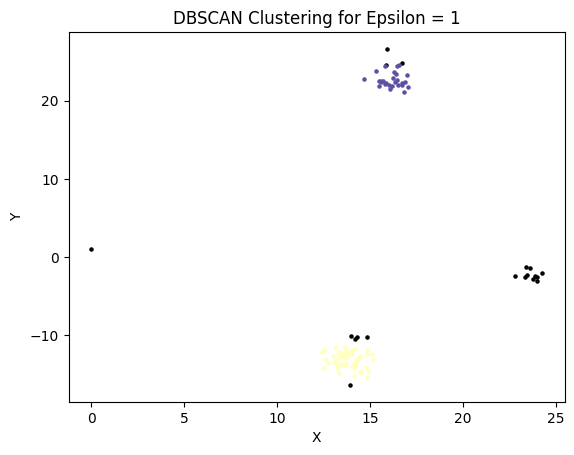

No of clusters : 3


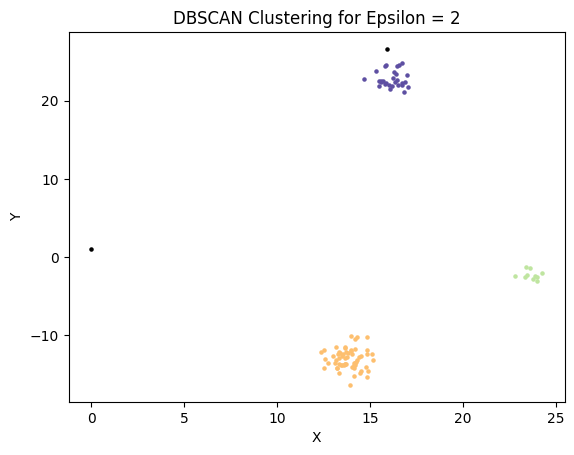

No of clusters : 3


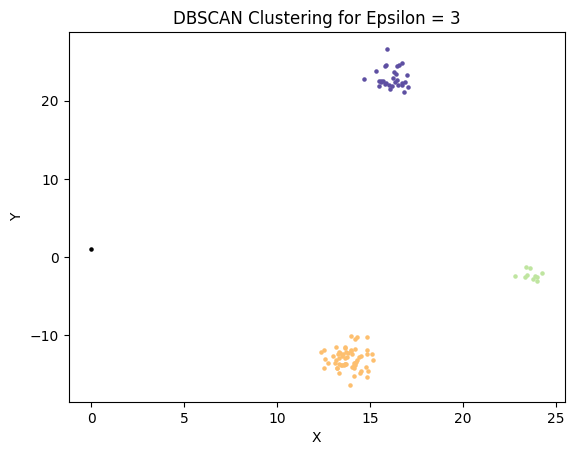

No of clusters : 3


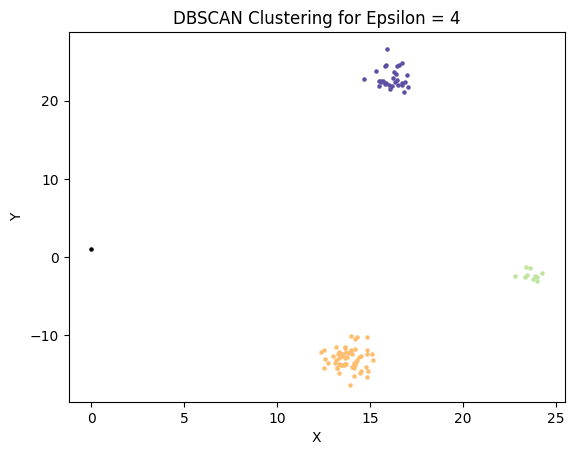

No of clusters : 3


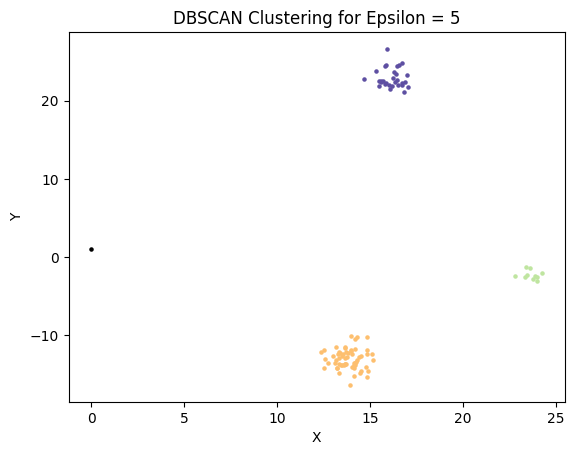

In [7]:
import matplotlib.pyplot as plt
X=np.loadtxt("dataset3.csv",delimiter=",")
plt.scatter(X[:,0],X[:,1],color='k',s=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
X=np.loadtxt("dataset3.csv",delimiter=",")
erange=[]
for i in range(0,6):
  erange.append(i)
partb(X,10,erange)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


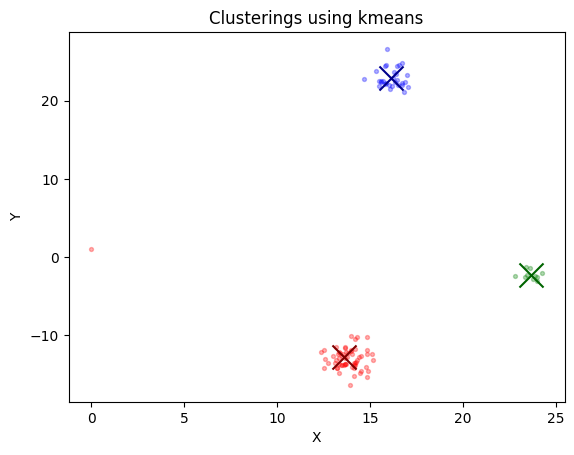

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
X=np.loadtxt("dataset3.csv",delimiter=",")
model=KMeans(n_clusters=3)
model.fit(X)
l=model.labels_
centroids=model.cluster_centers_
colors=['r','b','g']
for i in range(len(X)):
    plt.scatter(X[i,0],X[i,1],color=colors[l[i]],alpha=0.3,s=8)
i=0
colors=['maroon','darkblue','darkgreen']
for c in centroids:
  plt.scatter(c[0],c[1],marker='x',color=colors[i],s=300)
  i+=1
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusterings using kmeans')
plt.show()